# Essentials of Signals & Systems

A square wave signal alternates between two levels, typically -1 and +1 (or some other specified minimum and maximum values), with a constant period. The mathematical function describing a square wave can be defined piecewise or using a periodic function like the sign function. However, one of the most common methods to define a square wave mathematically is through its Fourier series representation, which provides a way to construct the signal using a sum of sine (or cosine) waves.

### Piecewise Definition

For a square wave with amplitude $ A $, period $ T $, and assuming it starts at $ A $ at $ t = 0 $, a piecewise definition can be:

$
s(t) = 
\begin{cases} 
A & \text{for } 0 \leq t < \frac{T}{2} \\
-A & \text{for } \frac{T}{2} \leq t < T 
\end{cases}
$
And $ s(t + T) = s(t) $ for all $ t $, making it periodic.

### Fourier Series Representation

A more sophisticated way to describe a square wave is through its Fourier series, which expresses the square wave as an infinite sum of sine waves. The Fourier series for a square wave of amplitude $ A $ and period $ T $ (with angular frequency $ \omega_0 = \frac{2\pi}{T} $) is given by:

$
s(t) = \frac{4A}{\pi} \sum_{n=1,3,5,...}^{\infty} \frac{1}{n} \sin(n \omega_0 t)
$

This series includes only the odd harmonics of the fundamental frequency $ \omega_0 $, reflecting the symmetry and particular shape of the square wave. The amplitude of each harmonic decreases as $ \frac{1}{n} $, where $ n $ is the harmonic order.

The Fourier series provides a precise mathematical model for the square wave, showing how it can be constructed from sinusoidal components. It's particularly useful in signal processing and electrical engineering for analyzing how square waves (or signals approximating square waves) interact with linear systems.

In [ ]:
using Plots

In [4]:
# Function to compute the Fourier series approximation of a square wave
function square_wave(t, A, T, N_terms)
    ω₀ = 2π / T
    s = zeros(length(t))
    for n in 1:2:(2N_terms - 1)  # Only odd harmonics
        s .+= (4A / (π * n)) * sin.(n * ω₀ .* t)
    end
    return s
end

square_wave (generic function with 1 method)

In [5]:
# Parameters
A = 1.0  # Amplitude
T = 2.0  # Period
N_terms = 10  # Number of terms in the Fourier series

# Time vector
t = 0:0.001:T*3  # Three periods

0.0:0.001:6.0

In [7]:
# Generate the square wave
s = square_wave(t, A, T, N_terms);

In [20]:
# Plot the square wave
pl1 = plot(t, s, label="Square Wave"
    , xlabel="Time", ylabel="Amplitude", title="Square Wave via Fourier Series"
);

In [9]:
using FFTW  # For computing the FFT

In [11]:
# Generate the square wave
N = 1024  # Number of points (make sure it's a power of 2 for efficient FFT)
t = range(0, stop=T*3, length=N)  # Recompute the time vector to cover three periods and match N
s = square_wave(t, A, T, N_terms);

In [13]:
# Compute the Fourier Transform
𝑆 = fft(s)

# Frequency vector (assuming sampling rate is 1/T for simplicity)
fₛ = 1.0 / T
f = (0:N-1) .* fₛ / N

0.0:0.00048828125:0.49951171875

In [21]:
# Plot the magnitude spectrum
pl2 = plot(f[1:N÷2], abs.(𝑆[1:N÷2]), label="Magnitude Spectrum"
    , xlabel="Frequency", ylabel="Magnitude", title="Fourier Transform of Square Wave"
);

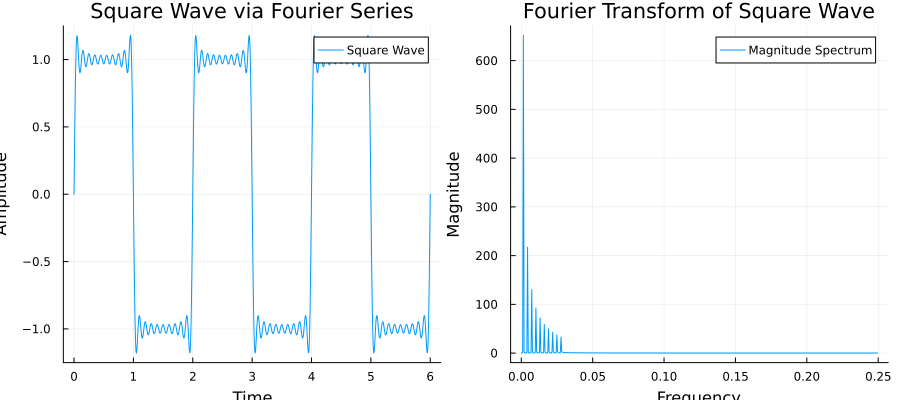

In [22]:
plot(pl1,pl2, size = (900,400))

# References
- [ ] [Essentials of Signals & Systems: Part 1](https://youtu.be/rw3U87aVfhc?si=Nq4DJM03Fra_JXAD)
- [ ] [Essentials of Signals & Systems: Part 2](https://www.youtube.com/watch?v=7-4uEHoY1m4)